In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('eurusd.csv', parse_dates = ['Date'], index_col = 'Date')

In [3]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
sma1 = 50
sma2 = 200

In [5]:
df['sma_s'] = df['price'].rolling(window = sma1).mean()
df['sma_l'] = df['price'].rolling(window = sma2).mean()

In [6]:
df

,price,sma_s,sma_l
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


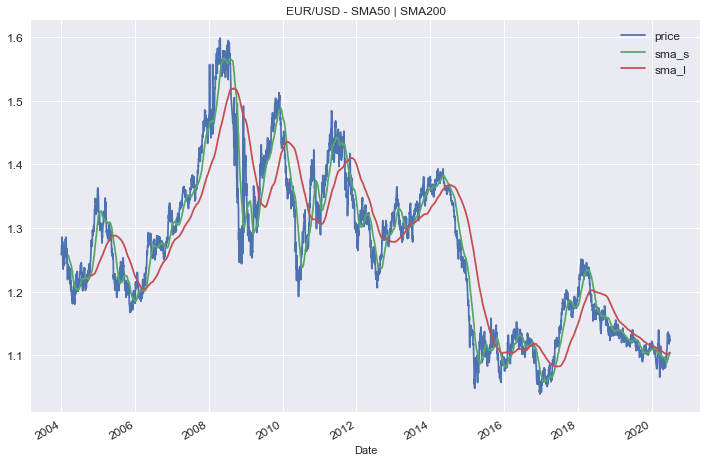

In [7]:
df.plot(figsize = (12, 8), title = 'EUR/USD - SMA{} | SMA{}'.format(sma1, sma2), fontsize = 12)
plt.legend(fontsize = 12);

In [8]:
df.dropna(inplace = True)

In [9]:
df

,price,sma_s,sma_l
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


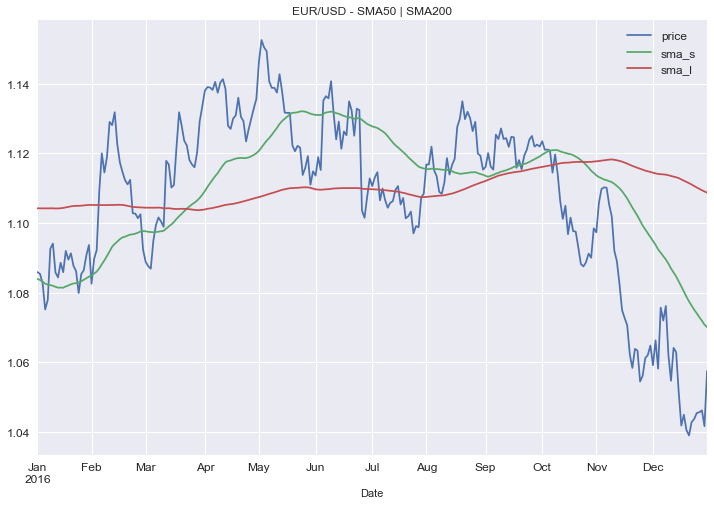

In [10]:
df.loc['2016'].plot(figsize = (12, 8), title = 'EUR/USD - SMA{} | SMA{}'.format(sma1, sma2), fontsize = 12)
plt.legend(fontsize = 12);

In [11]:
df['position'] = np.where(df['sma_s'] > df['sma_l'], 1, -1)

In [12]:
df

,price,sma_s,sma_l,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


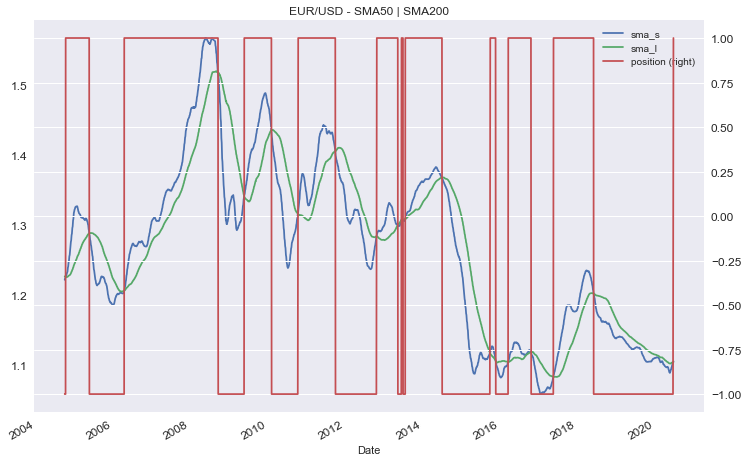

In [13]:
df.loc[:, ['sma_s', 'sma_l', 'position']].plot(figsize = (12, 8), fontsize = 12, secondary_y = 'position', title = 'EUR/USD - SMA{} | SMA{}'.format(sma1, sma2));

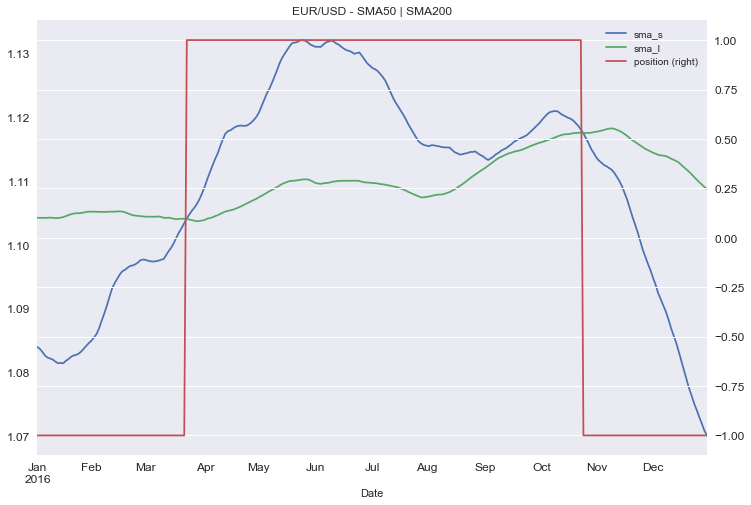

In [14]:
df.loc['2016', ['sma_s', 'sma_l', 'position']].plot(figsize = (12, 8), fontsize = 12, secondary_y = 'position', title = 'EUR/USD - SMA{} | SMA{}'.format(sma1, sma2));

# Vectorized Strategy Backtesting

In [15]:
df

,price,sma_s,sma_l,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


In [16]:
df['returns'] = np.log(df['price'] / df['price'].shift(1))

In [17]:
df

,price,sma_s,sma_l,position,returns
Date,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102
...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562


In [18]:
df['strategy'] = df['position'].shift(1) * df['returns']

In [19]:
df

,price,sma_s,sma_l,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [20]:
df.dropna(inplace = True)

In [21]:
# calculates absolute performance
df[['returns', 'strategy']].sum()

returns    -0.087929
strategy    0.249591
dtype: float64

In [22]:
# calculates absolute performance
df[['returns', 'strategy']].sum().apply(np.exp)

returns     0.915826
strategy    1.283500
dtype: float64

In [23]:
# annualized returns
df[['returns', 'strategy']].mean() * 252

returns    -0.005438
strategy    0.015435
dtype: float64

In [24]:
# annualized risk
df[['returns', 'strategy']].std() * np.sqrt(252)

returns     0.120806
strategy    0.120802
dtype: float64

In [25]:
df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)

In [26]:
df

,price,sma_s,sma_l,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


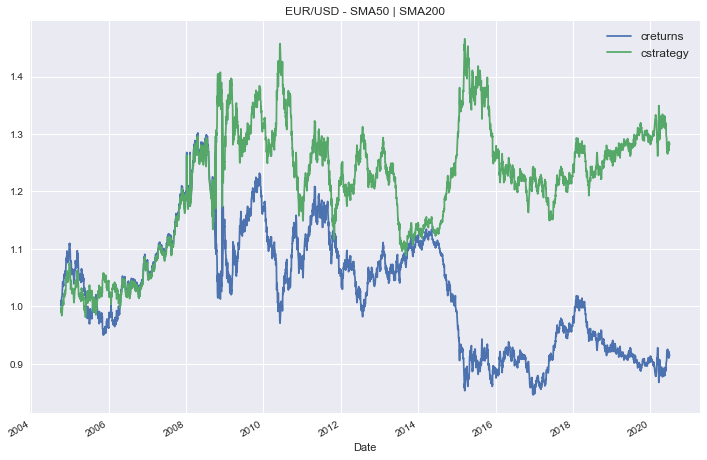

In [27]:
df[['creturns', 'cstrategy']].plot(figsize = (12, 8), title = 'EUR/USD - SMA{} | SMA{}'.format(sma1, sma2))
plt.legend(fontsize = 12);

In [28]:
outperf = df['cstrategy'].iloc[-1] - df['creturns'].iloc[-1]
outperf

0.3676743925451291

# Optimal SMA Strategy

In [30]:
data = pd.read_csv('eurusd.csv', parse_dates = ['Date'], index_col = 'Date')

In [31]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


## Creates a function that runs a SMA strategy

In [32]:
def run_strategy(SMA):
    df = data.copy()
    df['returns'] = np.log(df['price'] / df['price'].shift(1))
    df['sma_s'] = df['price'].rolling(window = int(SMA[0])).mean()
    df['sma_l'] = df['price'].rolling(window = int(SMA[1])).mean()
    df.dropna(inplace = True)
    
    df['position'] = np.where(df['sma_s'] > df['sma_l'], 1, -1)
    df['strategy'] = df['position'].shift(1) * df['returns']
    df.dropna(inplace = True)
    
    return df[['returns', 'strategy']].sum().apply(np.exp)

In [33]:
run_strategy((50, 200))

returns     0.915826
strategy    1.283500
dtype: float64

In [34]:
run_strategy((10, 50))

returns     0.919492
strategy    0.987000
dtype: float64

In [35]:
run_strategy((22, 252))

returns     0.83984
strategy    1.14928
dtype: float64

## Finds the Optimal Windows for the SMA Strategy

In [36]:
from itertools import product

In [37]:
sma_1 = range(10, 50, 1)
sma_2 = range(100, 252, 1)

In [38]:
results = pd.DataFrame()

for SMA_1, SMA_2 in product(sma_1, sma_2):
    df = data.copy()
    data.dropna(inplace = True)
    df['returns'] = np.log(df['price'] / df['price'].shift(1))
    df['sma_s'] = df['price'].rolling(window = int(SMA_1)).mean()
    df['sma_l'] = df['price'].rolling(window = int(SMA_2)).mean()
    df.dropna(inplace = True)
    
    df['position'] = np.where(df['sma_s'] > df['sma_l'], 1, -1)
    df['strategy'] = df['position'].shift(1) * df['returns']
    df.dropna(inplace = True)
    
    perf = df[['returns', 'strategy']].sum().apply(np.exp)
    
    results = results.append(pd.DataFrame({
        'SMA_1': SMA_1, 'SMA_2': SMA_2, 
        'MARKET' : perf['returns'], 
        'STRATEGY' : perf['strategy'], 
        'OUT' : perf['strategy'] - perf['returns']
    }, index = [0]), ignore_index = True)

In [39]:
results

,SMA_1,SMA_2,MARKET,STRATEGY,OUT
0,10,100,0.936959,0.919640,-0.017320
1,10,101,0.940637,0.901791,-0.038846
2,10,102,0.935081,0.908851,-0.026230
3,10,103,0.937342,0.917204,-0.020138
4,10,104,0.929446,0.990232,0.060785
...,...,...,...,...,...
6075,49,247,0.844384,1.282403,0.438020
6076,49,248,0.845081,1.303129,0.458048
6077,49,249,0.839098,1.267525,0.428427
6078,49,250,0.848781,1.275176,0.426394


In [40]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA_1     6080 non-null   int64  
 1   SMA_2     6080 non-null   int64  
 2   MARKET    6080 non-null   float64
 3   STRATEGY  6080 non-null   float64
 4   OUT       6080 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 237.6 KB


In [41]:
results.sort_values('OUT', ascending = False).head(10)

,SMA_1,SMA_2,MARKET,STRATEGY,OUT
5509,46,137,0.905647,2.526694,1.621047
5660,47,136,0.907402,2.513588,1.606186
5356,45,136,0.907402,2.490511,1.583109
5507,46,135,0.909156,2.464982,1.555825
5963,49,135,0.909156,2.447218,1.538061
5661,47,137,0.905647,2.439993,1.534346
4283,38,127,0.921674,2.455225,1.533551
5811,48,135,0.909156,2.439185,1.530028
5508,46,136,0.907402,2.432296,1.524895
4284,38,128,0.922889,2.427431,1.504541


## Optimal Strategy using Scipy!

In [42]:
def run_strategy(SMA):
    df = data.copy()
    df['returns'] = np.log(df['price'] / df['price'].shift(1))
    df['sma_s'] = df['price'].rolling(window = int(SMA[0])).mean()
    df['sma_l'] = df['price'].rolling(window = int(SMA[1])).mean()
    df.dropna(inplace = True)
    
    df['position'] = np.where(df['sma_s'] > df['sma_l'], 1, -1)
    df['strategy'] = df['position'].shift(1) * df['returns']
    df.dropna(inplace = True)
    
    return -df[['returns', 'strategy']].sum().apply(np.exp)[-1]
# maximizes absolute performance

In [43]:
from scipy.optimize import brute

In [44]:
brute(run_strategy, ((10, 50, 1), (100, 252, 1)))

array([ 46., 137.])

In [45]:
-run_strategy((46, 137))

2.5266939897810787

### Run strategy using our original function

In [46]:
def run_strategy(SMA):
    df = data.copy()
    df['returns'] = np.log(df['price'] / df['price'].shift(1))
    df['sma_s'] = df['price'].rolling(window = int(SMA[0])).mean()
    df['sma_l'] = df['price'].rolling(window = int(SMA[1])).mean()
    df.dropna(inplace = True)
    
    df['position'] = np.where(df['sma_s'] > df['sma_l'], 1, -1)
    df['strategy'] = df['position'].shift(1) * df['returns']
    df.dropna(inplace = True)
    
    return df[['returns', 'strategy']].sum().apply(np.exp)

In [47]:
run_strategy((46, 137))

returns     0.905647
strategy    2.526694
dtype: float64